# Assignment1 

## Matrix 구현 
1. Linear Regression 에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해 주세요 
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해 주세요 

### Data Load 

In [71]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("assignment1.csv")

In [2]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [3]:
data.shape # y:(9,1), X:(9,5)

(9, 6)

In [4]:
X = data.drop(["y"], axis=1)
y = data.y

In [5]:
# matrix 계산을 위해 numpy 형태로 바꾸어 줍니다 
X = X.to_numpy()
y = y.to_numpy()

In [6]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

In [7]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5], dtype=int64)

### 1. Normal Equation

In [8]:
import numpy as np
from numpy.linalg import inv 

In [27]:
def estimate_beta(X, y):
    intercept = np.ones([len(X),1])
    designX = np.concatenate((intercept,X), axis=1)
    beta_hat = np.dot(inv(np.dot(designX.T, designX)), np.dot(designX.T,y))
    
    return beta_hat

In [28]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

#### 실제 값과 비교

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

In [33]:
print(model.intercept_) # intercept
print(model.coef_) # 추정된 회귀계수 (intercept제외)

-39.244736781356536
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


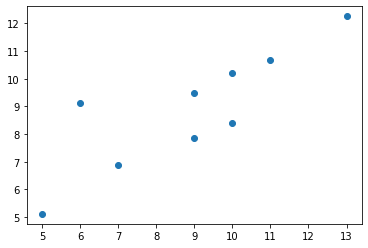

In [73]:
plt.scatter(y,pred)

In [65]:
np.square(np.subtract(y,pred))

array([0.04540263, 0.54772615, 0.09791192, 0.01667706, 2.58751767,
       0.22337837, 1.27512719, 9.73356226, 0.01307625])

### 2. MSE

In [79]:
def MSE(X, y, beta_hat):
    intercept = np.ones([len(X),1])
    designX = np.concatenate((intercept,X), axis=1) 
    y_pred = np.dot(designX,np.dot(inv(np.dot(designX.T, designX)), np.dot(designX.T,y)))
    print(y_pred)
    mse = np.square(np.subtract(y,y_pred)).mean()
    
    return mse

In [80]:
MSE(X, y, estimate_beta(X, y))

[10.21307892 12.25991477 10.68709119  6.87086032  8.39142371  9.47262921
  7.8707847   9.11986574  5.11435143]


1.6155977229019127

In [ ]:
MSE(X, y, estimate_beta(X, y))

4.846793168705742